In [193]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [194]:
df = pd.read_csv('medical_examination.csv')
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [195]:
# Calculate BMI

BMI = list((df['weight'] / ((df[ 'height'] / 100) ** 2)).round(decimals=2))
BMI

[21.97,
 34.93,
 23.51,
 28.71,
 23.01,
 29.38,
 37.73,
 29.98,
 28.44,
 25.28,
 28.01,
 20.05,
 22.04,
 31.24,
 29.0,
 37.86,
 25.95,
 20.83,
 28.67,
 21.34,
 31.24,
 27.99,
 36.05,
 18.49,
 23.53,
 27.77,
 24.24,
 30.85,
 23.95,
 25.91,
 43.7,
 24.86,
 23.73,
 28.52,
 27.4,
 20.7,
 31.02,
 26.03,
 27.43,
 25.71,
 25.15,
 21.46,
 23.6,
 24.92,
 21.08,
 24.39,
 40.77,
 24.45,
 22.86,
 23.88,
 29.3,
 29.41,
 30.85,
 28.28,
 34.19,
 26.81,
 25.99,
 33.06,
 28.39,
 23.8,
 22.94,
 27.55,
 32.89,
 29.41,
 24.86,
 36.52,
 23.88,
 33.17,
 32.89,
 21.5,
 23.73,
 29.65,
 23.83,
 31.24,
 27.78,
 30.04,
 29.71,
 26.56,
 27.4,
 27.51,
 19.38,
 26.64,
 30.04,
 47.61,
 29.35,
 22.6,
 30.82,
 34.11,
 40.35,
 29.41,
 32.03,
 38.3,
 25.39,
 28.34,
 25.71,
 21.23,
 23.88,
 36.36,
 34.6,
 25.46,
 20.86,
 28.69,
 27.28,
 28.37,
 24.91,
 27.64,
 22.86,
 17.85,
 17.84,
 20.69,
 26.57,
 30.85,
 31.24,
 32.05,
 30.12,
 22.27,
 25.93,
 35.16,
 25.06,
 25.89,
 29.17,
 25.43,
 24.22,
 23.67,
 23.88,
 20.08,
 22.

In [196]:
# Add 'overweight' column
df['overweight'] = [1 if x > 25 else 0 for x in BMI]
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


In [197]:
# Normalize 'cholesterol' & 'gluc'
df.loc[df['cholesterol'] == 1, 'cholesterol'] = 0
df.loc[df['gluc'] == 1, 'gluc'] = 0
df.loc[df['cholesterol'] > 1, 'cholesterol'] = 1
df.loc[df['gluc'] > 1, 'gluc'] = 1
df[['cholesterol', 'gluc']]

,cholesterol,gluc
0,0,0
1,1,0
2,1,0
3,0,0
4,0,0
...,...,...
69995,0,0
69996,1,1
69997,1,0
69998,0,1


In [198]:
# Categories
categories = ['cholesterol', 'gluc', 'alco', 'smoke', 'active', 'overweight']

# Cardio = 0
cardio_zero = pd.DataFrame(df[df['cardio'] == 0][categories]).reset_index()

# Cardio = 1
cardio_one = pd.DataFrame(df[df['cardio'] == 1][categories]).reset_index()
cardio_one

,index,cholesterol,gluc,alco,smoke,active,overweight
0,1,1,0,0,0,1,1
1,2,1,0,0,0,0,0
2,3,0,0,0,0,1,1
3,7,1,1,0,0,1,1
4,15,0,0,0,0,0,1
...,...,...,...,...,...,...,...
34974,69993,0,0,0,0,1,0
34975,69994,0,0,0,0,1,1
34976,69996,1,1,0,0,1,1
34977,69997,1,0,1,0,0,1


In [199]:
# Cardio 0
cardio_zero_zero = cardio_zero[categories]
cardio_zero_zero = cardio_zero_zero.apply(pd.value_counts)
cardio_zero_zero

C:\Users\sergi\AppData\Local\Temp\ipykernel_24612\3935507841.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  cardio_zero_zero = cardio_zero_zero.apply(pd.value_counts)


,cholesterol,gluc,alco,smoke,active,overweight
0,29330,30894,33080,31781,6378,15915
1,5691,4127,1941,3240,28643,19106


In [200]:
# Cardio 1
cardio_zero_one = cardio_one[categories]
cardio_zero_one = cardio_zero_one.apply(pd.value_counts)
cardio_zero_one

C:\Users\sergi\AppData\Local\Temp\ipykernel_24612\2957612949.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  cardio_zero_one = cardio_zero_one.apply(pd.value_counts)


,cholesterol,gluc,alco,smoke,active,overweight
0,23055,28585,33156,32050,7361,10539
1,11924,6394,1823,2929,27618,24440


In [201]:
# Combine both Cardio 0 and Cardio 1
cardio_df = pd.concat(
    [cardio_zero_zero, cardio_zero_one],
    axis=0, join='inner',
    keys=['0', '1']
    ).T.reset_index(drop=True)
    
cardio_df

0             1       
       0      1      0      1
0  29330   5691  23055  11924
1  30894   4127  28585   6394
2  33080   1941  33156   1823
3  31781   3240  32050   2929
4   6378  28643   7361  27618
5  15915  19106  10539  24440

In [202]:
# Insert column with variables
cardio_df.insert(loc=0, column='variable', value=categories)
cardio_df

variable      0             1       
                    0      1      0      1
0  cholesterol  29330   5691  23055  11924
1         gluc  30894   4127  28585   6394
2         alco  33080   1941  33156   1823
3        smoke  31781   3240  32050   2929
4       active   6378  28643   7361  27618
5   overweight  15915  19106  10539  24440

In [203]:
# Long format
long = pd.melt(cardio_df, id_vars=['variable'], value_name='total')
long.rename(columns={'variable_0':'cardio', 'variable_1':'value'}, inplace=True)
long

,variable,cardio,value,total
0,cholesterol,0,0,29330
1,gluc,0,0,30894
2,alco,0,0,33080
3,smoke,0,0,31781
4,active,0,0,6378
5,overweight,0,0,15915
6,cholesterol,0,1,5691
7,gluc,0,1,4127
8,alco,0,1,1941
9,smoke,0,1,3240


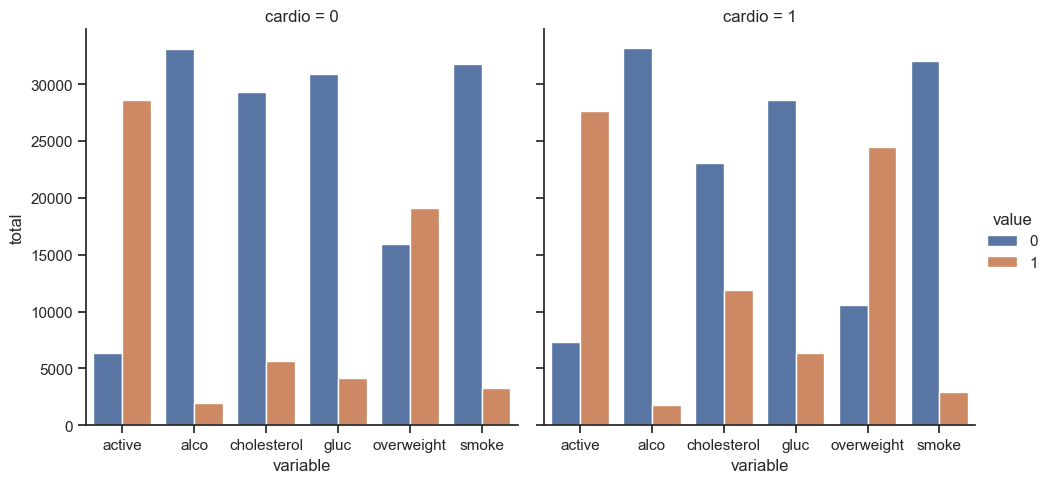

In [204]:
# Seaborn's catplot
sns.set_theme(style='ticks')

cardio_charts = sns.catplot(
    x='variable',
    y='total',
    hue='value',
    data=long, kind='bar',
    col='cardio',
    order=long.sort_values('variable')['variable']
    )

plt.show()

In [205]:
# Diastolic pressure: correct data
df = df.loc[(df['ap_lo'] <= df['ap_hi'])]
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [206]:
# Height is less than 2.5th percentile
df = df.loc[(df['height'] >= df['height'].quantile(0.025))]
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [207]:
# Height is more than the 97.5th percentile
df = df.loc[(df['height'] <= df['height'].quantile(0.975))]
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [208]:
# Weight is less than 2.5th percentile
df = df.loc[(df['weight'] >= df['weight'].quantile(0.025))]
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [209]:
# Weight is more than 97.5th percentile
df = df.loc[(df['weight'] <= df['weight'].quantile(0.975))]
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [210]:
# Clean DataFrame
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [211]:
# Correlation matrix
corr_matrix = df.corr()
corr_matrix

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002623,0.003799,0.000221,0.000144,0.003489,0.000429,0.003867,0.002477,-0.002403,-0.001039,0.005890,0.003770,-0.000769
age,0.002623,1.000000,-0.018274,-0.077426,0.069705,0.018482,0.152787,0.129582,0.087280,-0.044208,-0.026956,-0.011471,0.239987,0.089282
sex,0.003799,-0.018274,1.000000,0.504722,0.130116,0.004941,0.059500,-0.037669,-0.021178,0.337682,0.169178,0.007702,0.001727,-0.055146
height,0.000221,-0.077426,0.504722,1.000000,0.248868,0.004300,0.015356,-0.064477,-0.031410,0.187389,0.089257,-0.005042,-0.025673,-0.156139
weight,0.000144,0.069705,0.130116,0.248868,1.000000,0.026527,0.223786,0.132686,0.104475,0.055805,0.058286,-0.012112,0.166886,0.655764
ap_hi,0.003489,0.018482,0.004941,0.004300,0.026527,1.000000,0.072260,0.022606,0.011004,-0.001978,0.000607,-0.000162,0.050321,0.016900
ap_lo,0.000429,0.152787,0.059500,0.015356,0.223786,0.072260,1.000000,0.148701,0.073920,0.022997,0.031839,0.002184,0.326125,0.169567
cholesterol,0.003867,0.129582,-0.037669,-0.064477,0.132686,0.022606,0.148701,1.000000,0.383601,0.012797,0.037588,0.002804,0.202257,0.126770
gluc,0.002477,0.087280,-0.021178,-0.031410,0.104475,0.011004,0.073920,0.383601,1.000000,-0.004203,0.013617,-0.009629,0.088267,0.086850
smoke,-0.002403,-0.044208,0.337682,0.187389,0.055805,-0.001978,0.022997,0.012797,-0.004203,1.000000,0.341434,0.027203,-0.020605,-0.003981


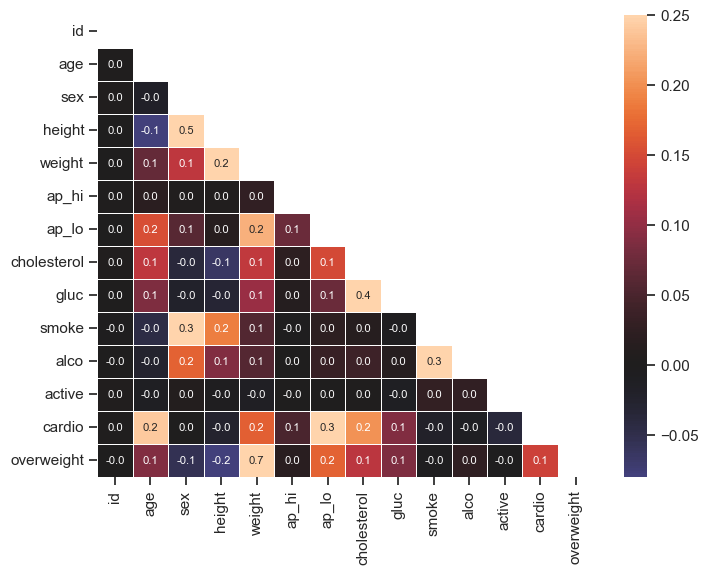

In [216]:
# Correlation matrix plot
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(8,6))
corr_plot = sns.heatmap(
    data=corr_matrix, mask=mask,
    vmin=-0.08, vmax=0.25, annot=True,
    center=-0.0, linewidths=.5,
    fmt='.1f', annot_kws={"size": 8})
plt.show()